# Fitting a straight line

Consider a $N \times 1$ data vector $\mathbf{d}$ whose $i$th element $d_{i}$ is given by:

$$
d_{i} \approx f(x_{i}) \: ,
$$

where $f(x)$ is an unknown function depending on the variable $x$. Besides, consider that each $d_{i}$ can be approximated as follows:

$$
d_{i} \approx a + b \, x_{i} \: ,
$$

where $a$ and $b$ are unknown constants.

### Exercise 1

1.1) Create a function called `straight_line_matrix` that receives a coordinate vector $\mathbf{x}$ and returns the matrix $\mathbf{A}$ according to the template below:

```python
def straight_line_matrix(x, check_input=True):
    '''
    Compute the matrix associated with the straight line fitting.

    Parameters
    ----------
    x : numpy array 1d
        Vector containing the coordinates of data points.
    check_input : boolean
        If True, verify if the input is valid. Default is True.
    Returns
    -------
    A : numpy array 2d
        Computed matrix.
    '''
    # if check_input is True, assert that x is a numpy array with ndim=1

    # create your code here

    return A
```

  
Hint: compute $\mathbf{A}$ by stacking to a vector of ones and the coordinate vector $\mathbf{x}$ (see the cells at the end of this notebook).

1.2) Create a function called `straight_line` that receives a data vector $\mathbf{d}$ and a coordinate vector $\mathbf{x}$ and returns a numpy array $\mathbf{p}$ containing the estimated constants $a$ and $b$. Use the function `straight_line_matrix` created at item 1 and your previously implemented functions for calculating any matrix operation and/or solving any linear system. The function `straight_line` must follow the template below:

```python
def straight_line(d, x, check_input=True):
    '''
    Compute the matrix associated with the straight line fitting.

    Parameters
    ----------
    d : numpy array 1d
        Vector containing the measured data.
    x : numpy array 1d
        Vector containing the coordinates of data points.
    check_input : boolean
        If True, verify if the input is valid. Default is True.
    Returns
    -------
    p : numpy array 1d
        Vector containing the coeficients of the fitted straight line.
    '''
    # if check_input is True, 
    # 1) assert that x is a numpy array with ndim=1
    # 2) assert that d is a numpy array with ndim=1
    # 3) assert that x and d have the same size

    # create your code here

    return p
```

1.3) Create a function called `parameter_covariance` that receives a constant data standard deviation $\sigma_{\mathbf{d}}$ and the matrix $\mathbf{A}$ and returns the covariance matrix $\mathbf{\Sigma}_{\mathbf{p}}$ ([equation 22](#eq22)). Use your previously implemented functions for computing the inverse. Use the template below:

```python
def parameter_covariance(sigma_d, A, check_input=True):
    '''
    Compute the parameters covariance matrix.

    Parameters
    ----------
    sigma_d : positive scalar
        Standard deviation of the measured data.
    A : numpy array 2d
        Matrix associated with the straight line fitting (output of the
        'straight_line_matrix' function.
    check_input : boolean
        If True, verify if the input is valid. Default is True.
    Returns
    -------
    Sigma_p : numpy array 2d
        Parameters covariance matrix.
    '''
    # if check_input is True, 
    # 1) assert that sigma_d is a positive int or float
    # 2) assert that A is a numpy array with ndim=2 and two columns

    # create your code here

    return Sigma_p
```

### Exercise 2

2.1) Create a test to compare the result of your function `straight_line_matrix` with [`numpy.polynomial.polynomial.polyvander`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyvander.html#numpy.polynomial.polynomial.polyvander). (see the cell at the end of this notebook).

2.2) Create a regularly spaced coordinate vector `x`; create coefficients `a` and `b`; compute a data vector `d` by using your function `straight_line_matrix` (see the cells at the end of this notebook); use your function `straight_line` to compute a parameter vector `p_estimated`; compare `p_estimated` and `p_true = [a, b]`.

2.3) Create a simple matrix $\mathbf{A}$ (without necessarily using the function `straight_line_matrix`) that results in a matrix $\mathbf{A}^{\top}\mathbf{A}$ with known inverse $\left( \mathbf{A}^{\top}\mathbf{A} \right)^{-1}$; set a value for $\sigma_{\mathbf{d}}$; use $\sigma_{\mathbf{d}}$ and $\left( \mathbf{A}^{\top}\mathbf{A} \right)^{-1}$ to compute $\mathbf{\Sigma}_{\mathbf{p}}$ ([equation 22](#eq22)); compare this result with that produced by function `parameter_covariance`.

### Exercise 3

In a Jupyter Notebook called `least_squares_YOURNAME`:

3.1) Create a coordinate vector `x`.

3.2) Define values for parameters `a` and `b`of the true straight line.

3.3) Calculate a noise-free data vector `d_noise_free` (see the cells below).

3.4) Create a noise-corrupted data vector `d_noisy` by using the noise-free data `d_noise_free` and the `numpy Random Generator` (see the cells below).

3.5) Estimate the parameter vector `p_estimated` and the standard deviation of coefficients `a` and `b` by using `straight_line` and `parameter_covariance`.

3.6) Use one of your functions for matrix-vector multiplication to compute the predicted data vector `d_predicted` by using the estimated parameter vector `p_estimated`.

3.7) Compute the parameters uncertainties by using your function `parameter_covariance`.

3.8) Plot the noise-corrupted data `d_noisy`, the predicted data `d_predicted`, the estimated coefficients `a` and `b` and their uncertainties.

#### Simulating noise-free and noise-corrupted data

The noise are generated by using the routine [`numpy Random Generator`](https://numpy.org/doc/stable/reference/random/generator.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# number of data
N = 31

# coordinates of the data
x = np.linspace(0., 30., N)

xmax = np.max(x)
xmin = np.min(x)
Dx = xmax - xmin

# true constants a and b
a = -5.
b = 0.1

# noise-free data vector
d_free = a + b*x

# Gaussian noise with null mean and standard deviation defined 
#by the variable stdev
stdev = 0.3
rng = np.random.default_rng(seed=76245680864342)
noise = rng.normal(loc = 0., scale=stdev, size=N)

# noise-corrupted data vector
d_noisy = d_free + noise

dmin = np.min(d_noisy)
dmax = np.max(d_noisy)
Dd = dmax - dmin

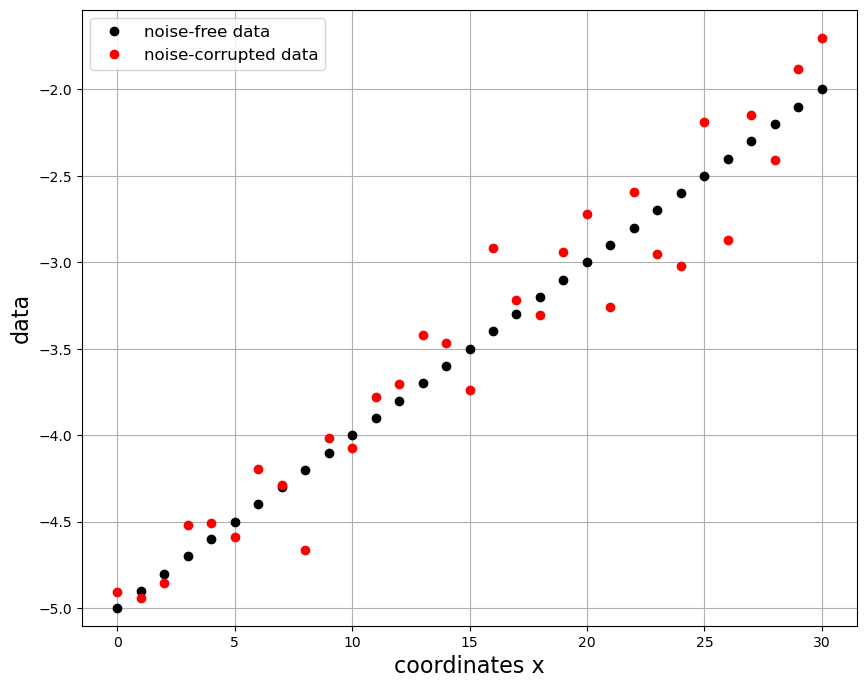

In [3]:
plt.close('all')
plt.figure(figsize=(10,8))
plt.plot(x, d_free, 'ko', label='noise-free data')
plt.plot(x, d_noisy, 'ro', label='noise-corrupted data')
plt.xlim(xmin - 0.05*Dx, xmax + 0.05*Dx)
plt.ylim(dmin - 0.05*Dd, dmax + 0.05*Dd)
plt.xlabel('coordinates x', fontsize=16)
plt.ylabel('data', fontsize=16)
plt.grid()
plt.legend(loc='best', fontsize=12)
plt.show()

#### Illustrating the function [`numpy.polynomial.polynomial.polyvander`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyvander.html#numpy.polynomial.polynomial.polyvander)

In [4]:
x = np.arange(10)

In [5]:
np.polynomial.polynomial.polyvander(x, deg=0)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
np.polynomial.polynomial.polyvander(x, deg=1)

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [7]:
np.polynomial.polynomial.polyvander(x, deg=2)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])